<a href="https://colab.research.google.com/github/VVidhyashree/heart_disease_prediction/blob/main/Heart_Disease_Prediction_using_Logistic_Regression_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier

In [ ]:
df = pd.read_csv('/content/Heart disease.csv')
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.drop(columns = 'education', inplace = True)

In [ ]:
df.shape

(4238, 15)

In [ ]:
df.dropna(axis = 0, inplace = True)
print(df.shape)
print(df.TenYearCHD.value_counts())

(3749, 15)
0    3177
1     572
Name: TenYearCHD, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3749 non-null   int64  
 1   age              3749 non-null   int64  
 2   currentSmoker    3749 non-null   int64  
 3   cigsPerDay       3749 non-null   float64
 4   BPMeds           3749 non-null   float64
 5   prevalentStroke  3749 non-null   int64  
 6   prevalentHyp     3749 non-null   int64  
 7   diabetes         3749 non-null   int64  
 8   totChol          3749 non-null   float64
 9   sysBP            3749 non-null   float64
 10  diaBP            3749 non-null   float64
 11  BMI              3749 non-null   float64
 12  heartRate        3749 non-null   float64
 13  glucose          3749 non-null   float64
 14  TenYearCHD       3749 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.6 KB


In [ ]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.isna().sum().sort_values(ascending = True)

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Text(0.5, 0, 'age')

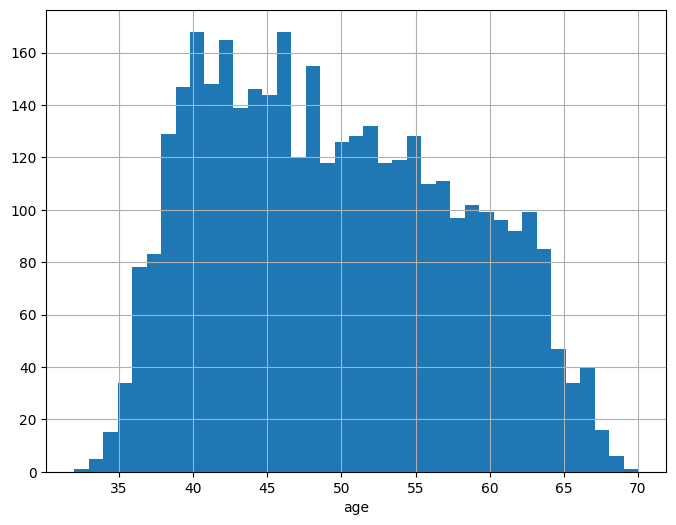

In [ ]:
plt.figure(figsize=(8, 6))
df.age.hist(bins=df.age.nunique())
plt.xlabel('age')

<Figure size 800x600 with 0 Axes>

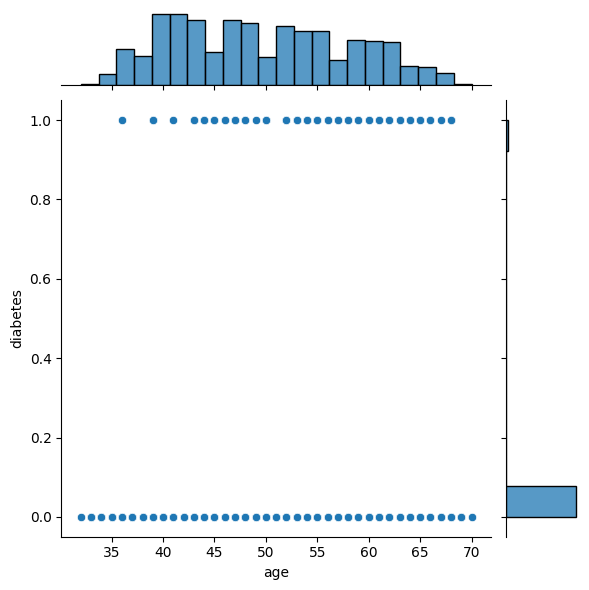

In [ ]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=df["age"], y=df.diabetes)

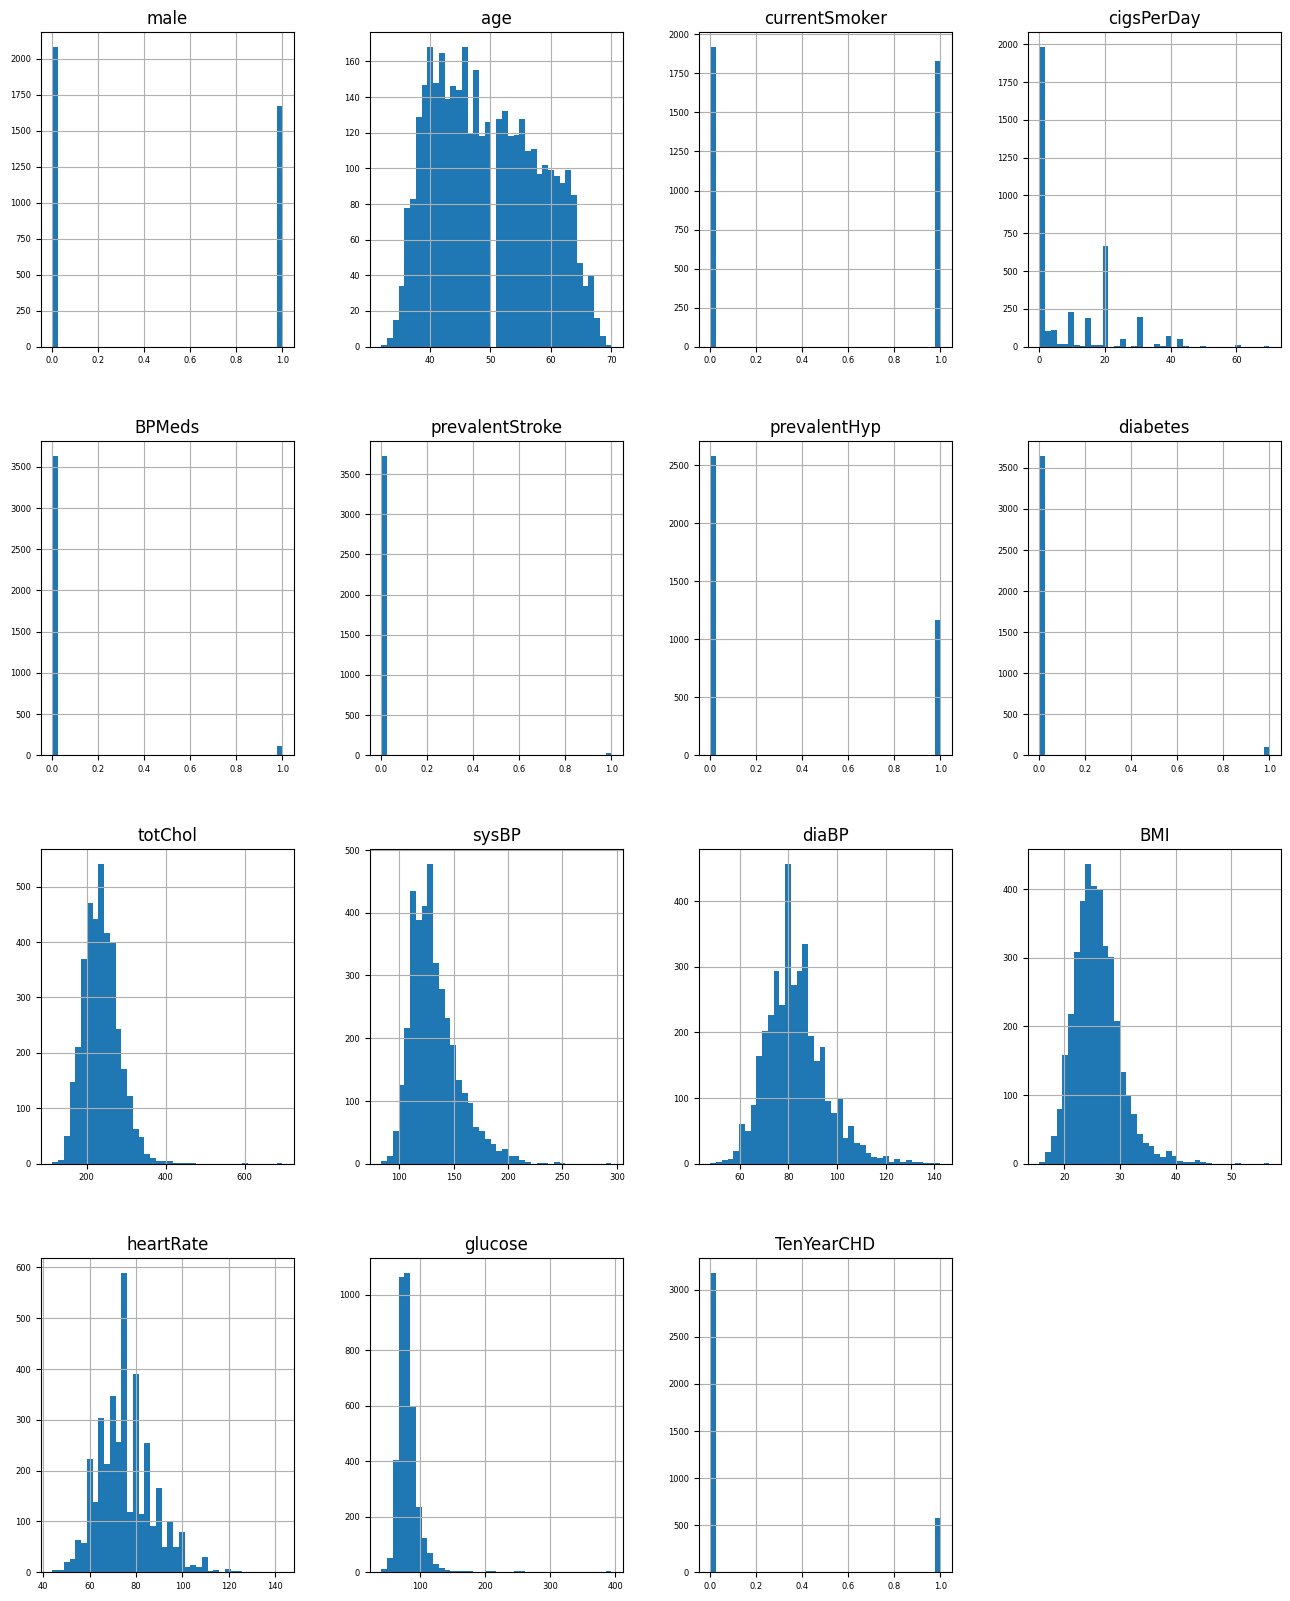

In [ ]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

In [ ]:
#filled missing values in 'cigsPerDay' column with 0
df['cigsPerDay'].fillna(value=0.0,inplace=True)

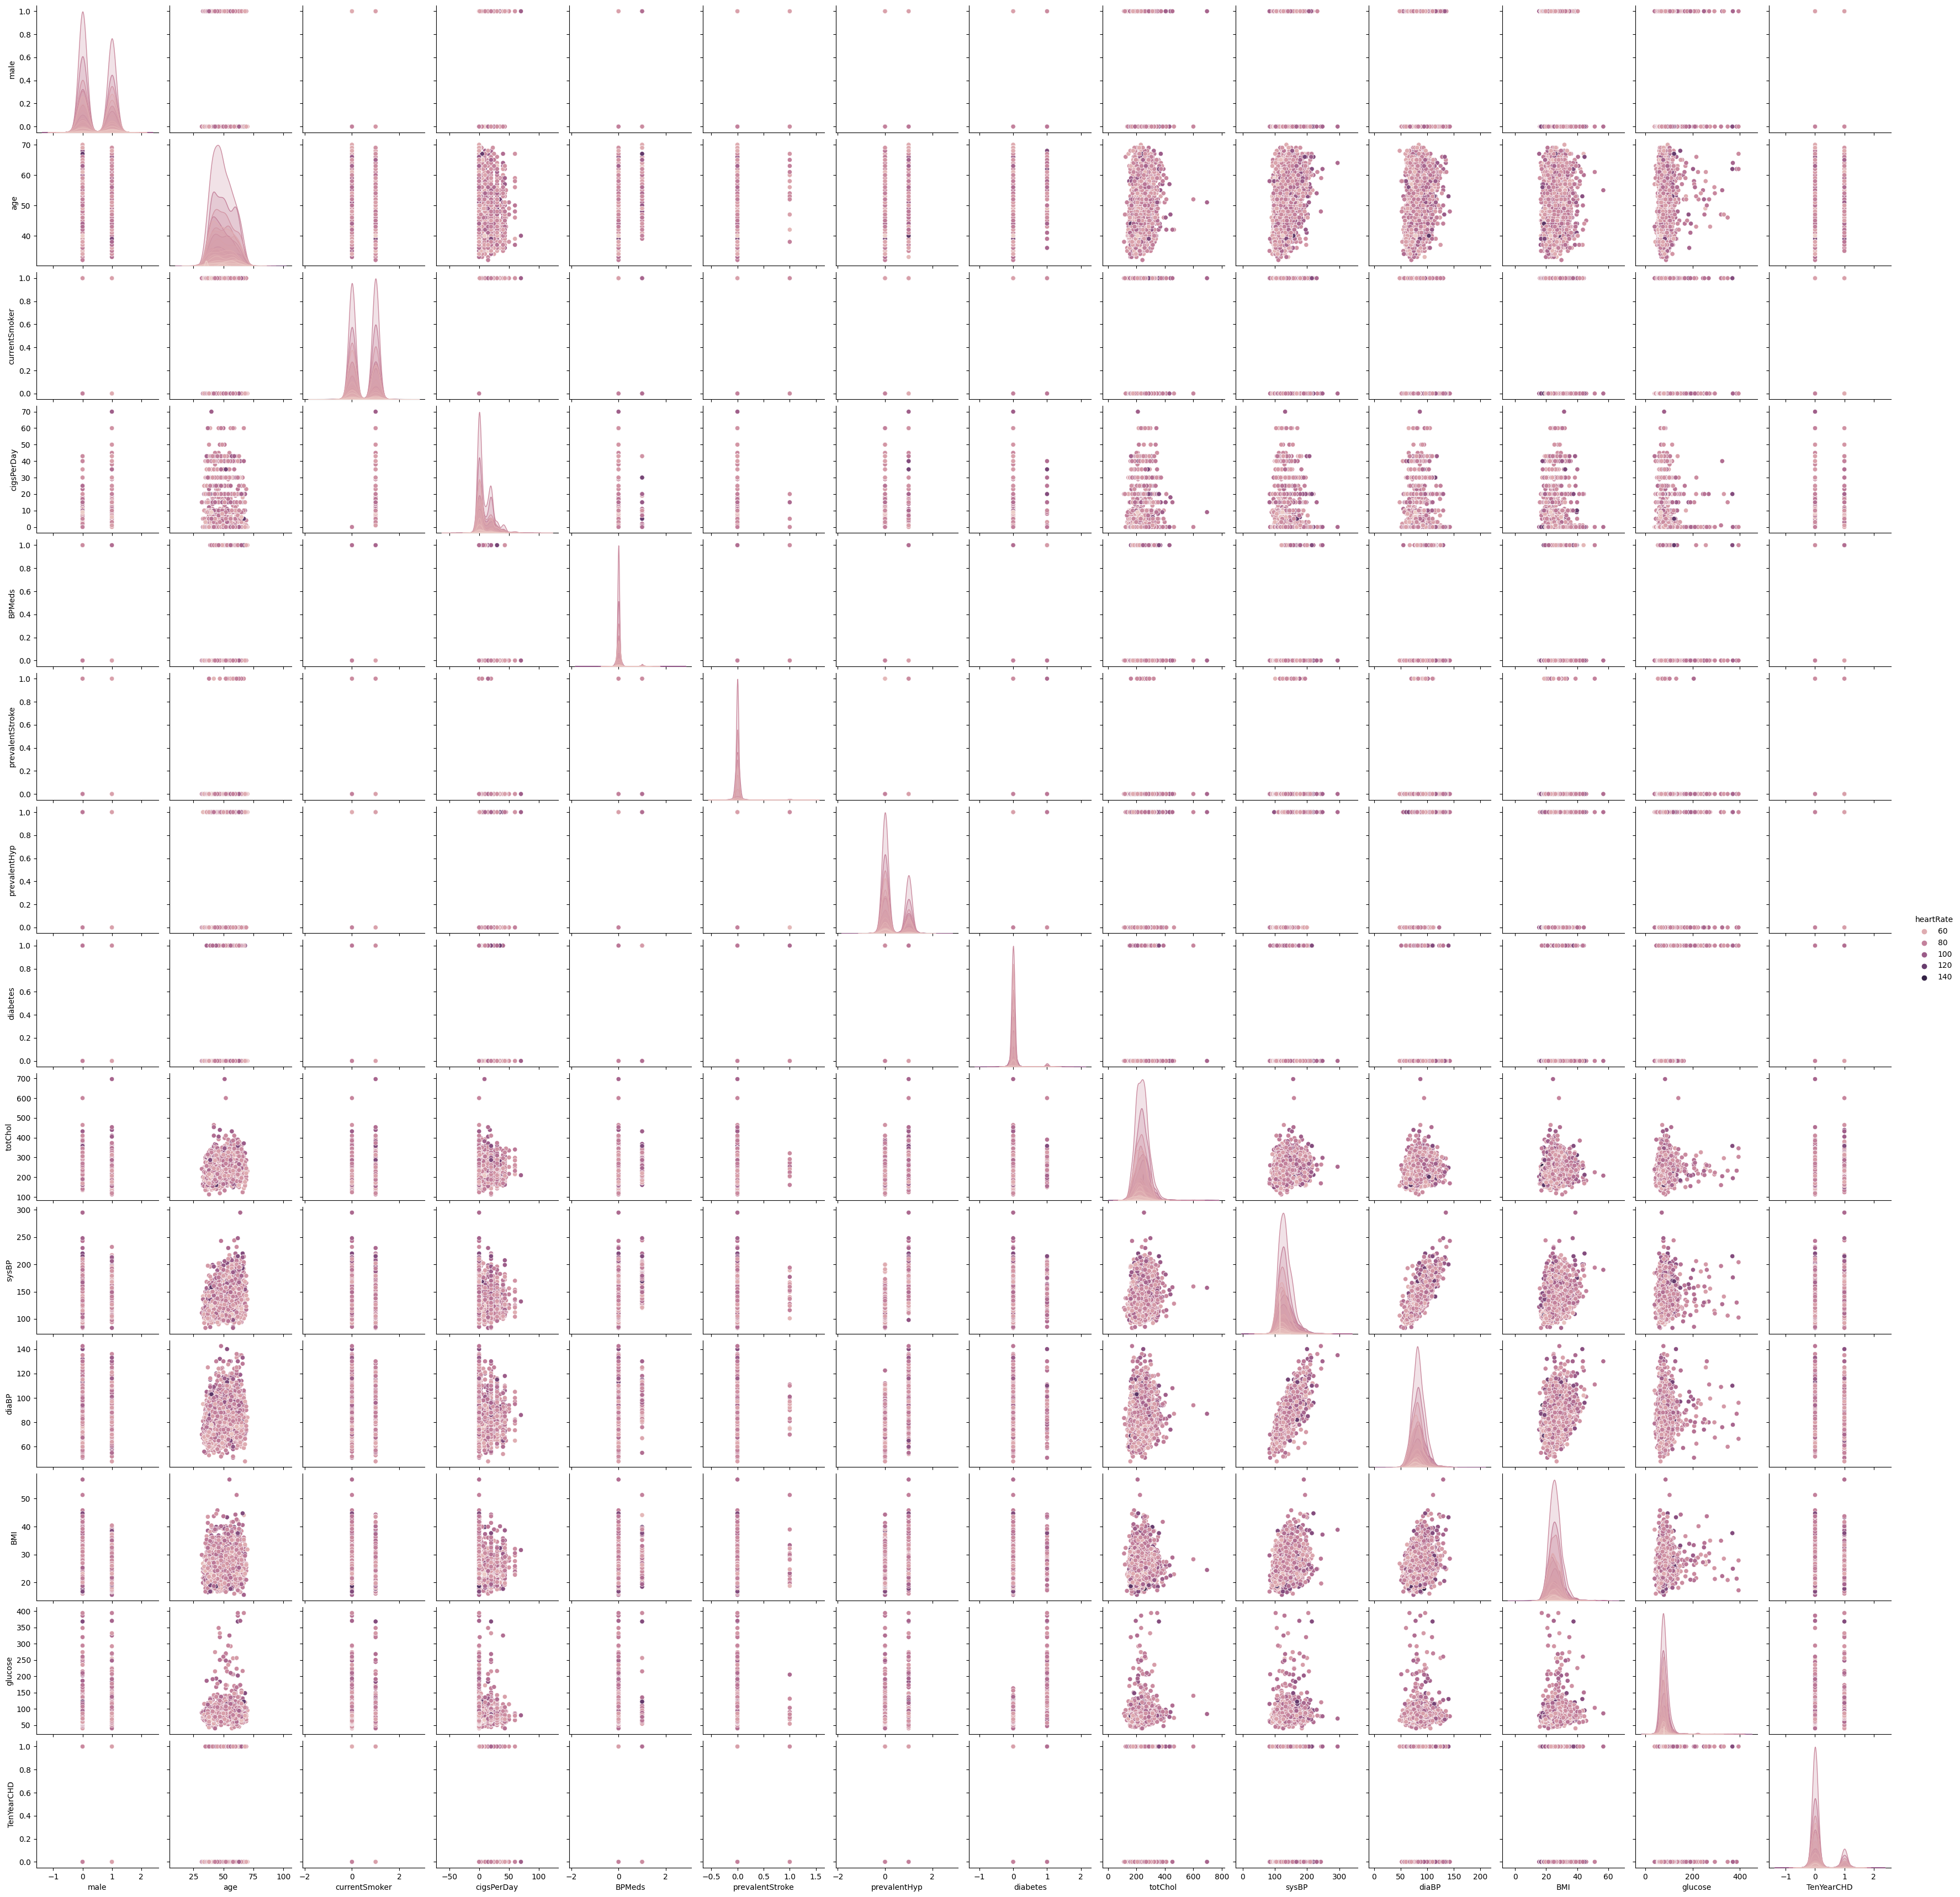

In [ ]:
sns.pairplot(df,hue='heartRate')

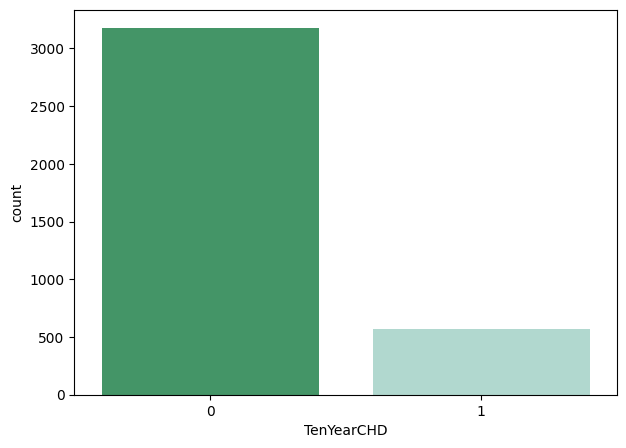

In [ ]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=df, palette="BuGn_r")
plt.show()


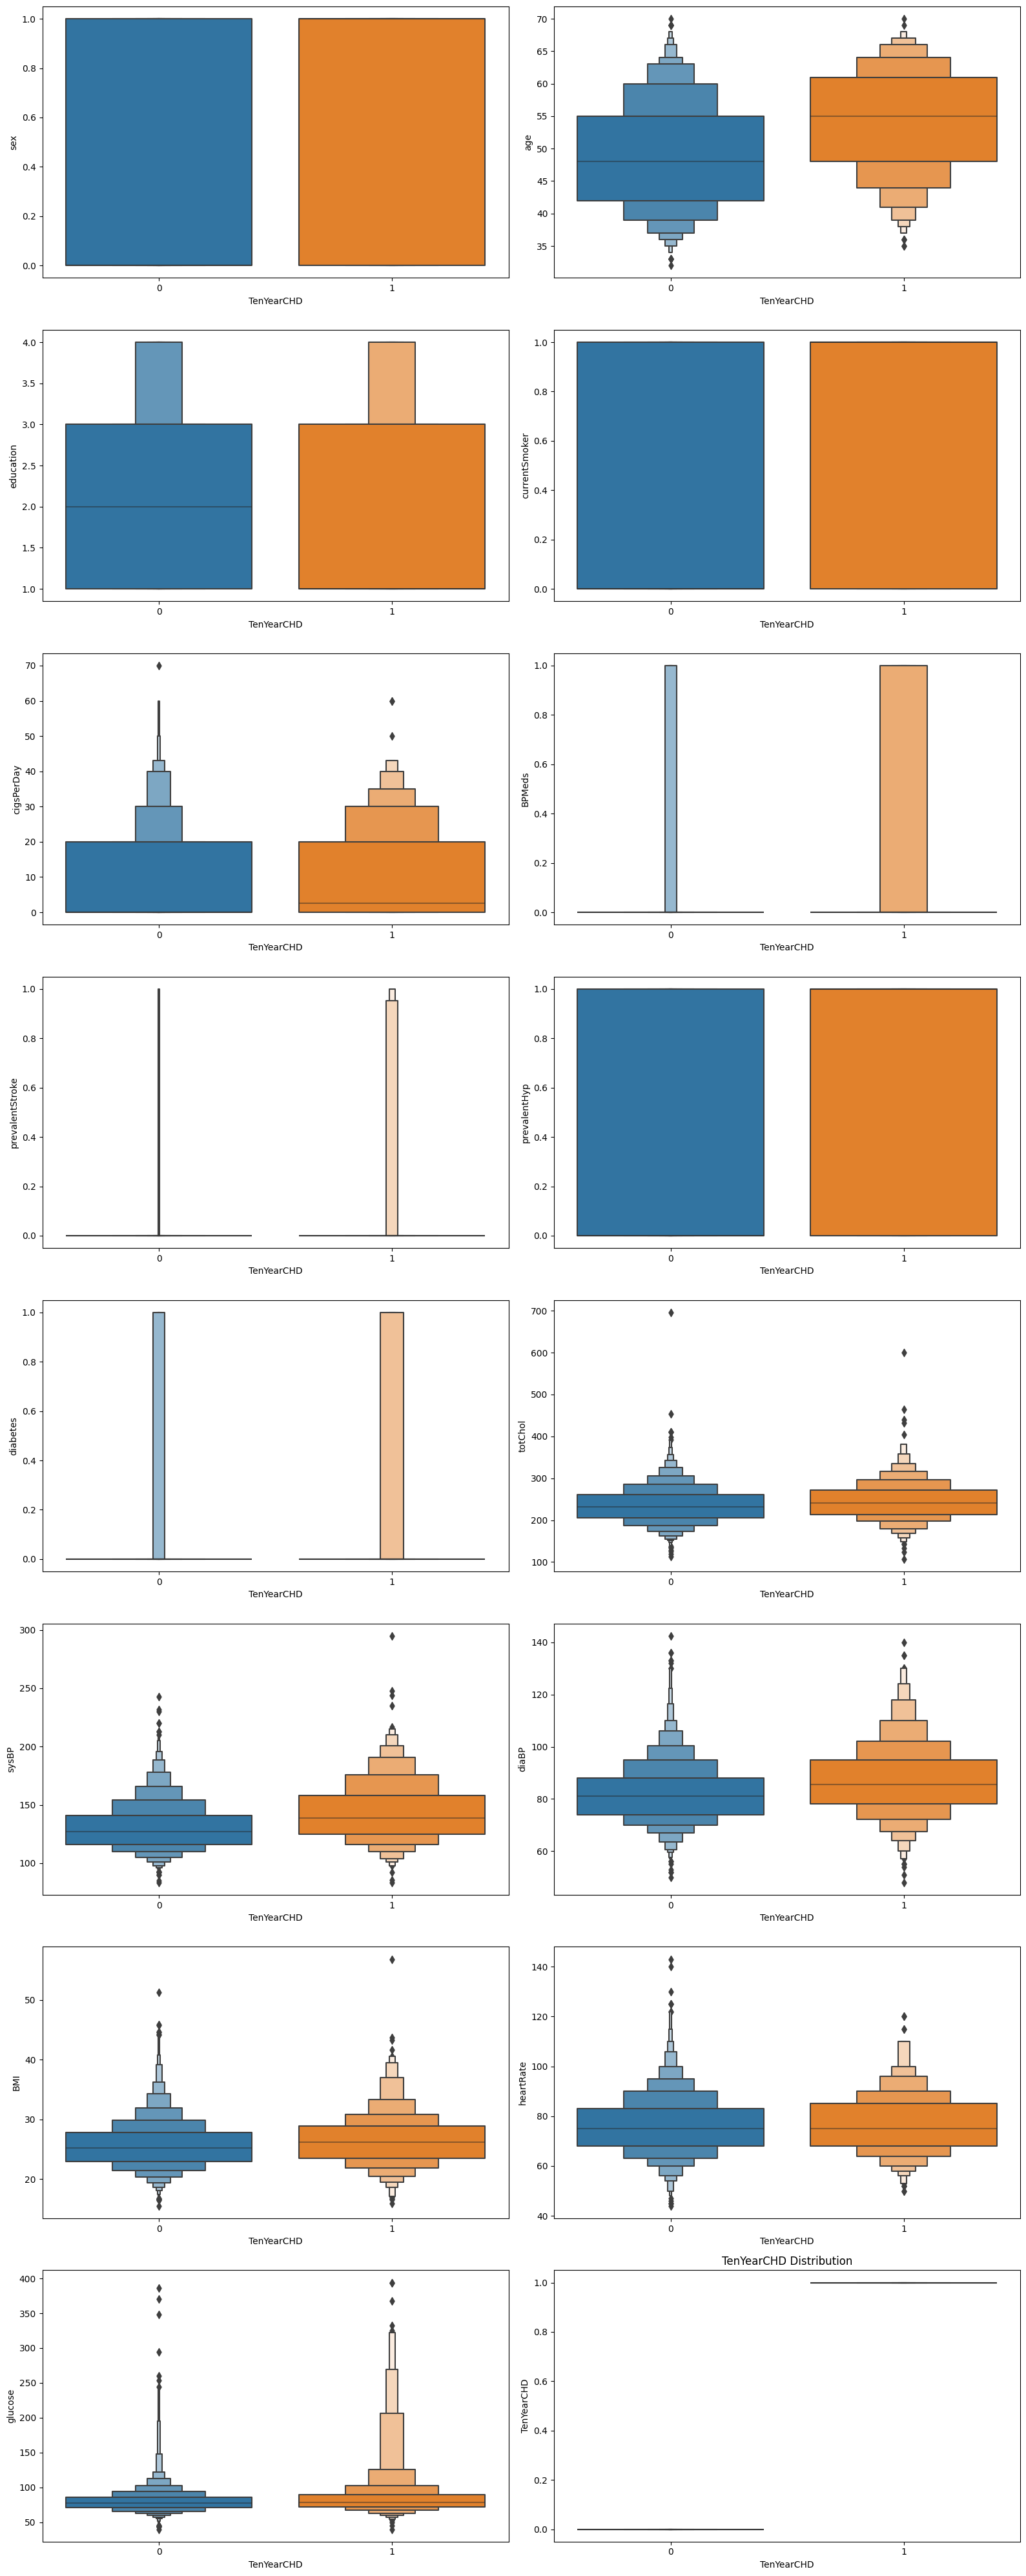

In [ ]:
fig, axes = plt.subplots(nrows=(len(df.columns) + 1) // 2, ncols=2, figsize=(16, 40))
for idx,column in enumerate(df):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.boxenplot( x='TenYearCHD' , y= column , data=df, ax=axes[row_idx, col_idx])
    plt.xlabel('TenYearCHD')
    plt.ylabel(column)
    plt.title(f"{column} Distribution")
    plt.tight_layout();

<Axes: >

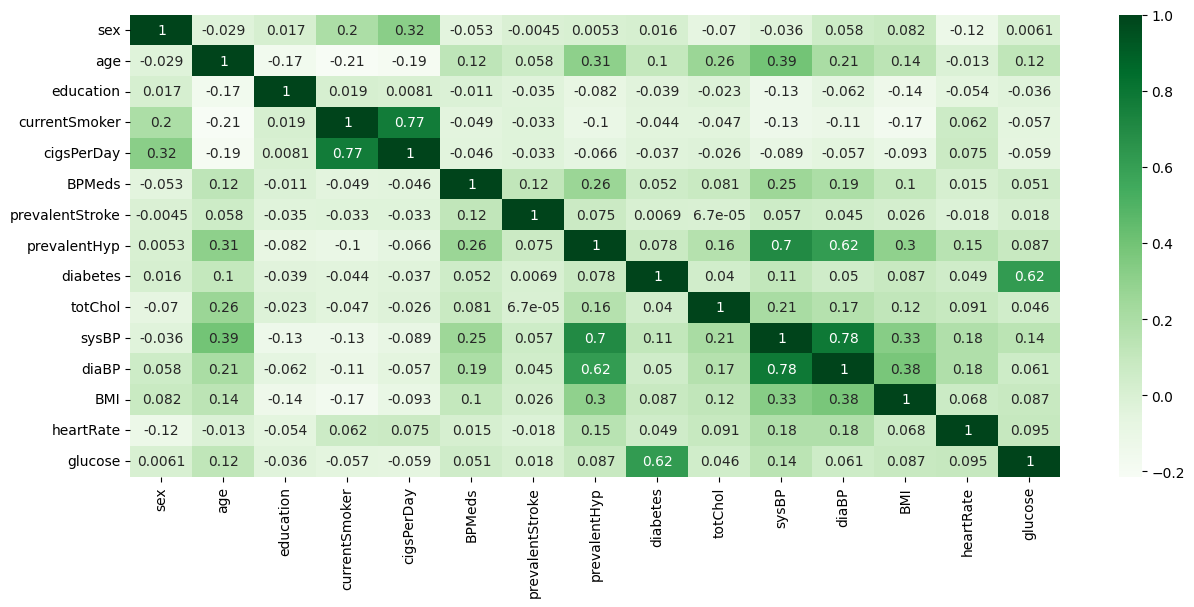

In [ ]:
corr = df.drop(columns= 'TenYearCHD').corr()
fig , ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens')

In [ ]:
from sklearn import preprocessing
X = np.asarray(df[['age', 'sex', 'cigsPerDay',
						'totChol', 'sysBP', 'glucose']])
y = np.asarray(df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
		X, y, test_size = 0.3, random_state = 4)


print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)


Train set: (2966, 6) (2966,)
Test set: (1272, 6) (1272,)


In [ ]:
X = df.drop(columns=['TenYearCHD'])
target = df['TenYearCHD']

X_train , X_test , y_train , y_test = train_test_split(X ,target ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3390, 15)
y_train shape: (3390,)
X_test shape: (848, 15)
y_test shape: (848,)


In [ ]:
dummy_classifier = DummyClassifier(strategy = 'most_frequent')
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.8538


In [ ]:
LR_model = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(),
    LogisticRegression()
)
LR_model.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
LR_model.score(X_train , y_train)

0.8542772861356932

In [ ]:
LR_pred = LR_model.predict(X_test)
LR_acc_score = accuracy_score(y_test , LR_pred)
LR_acc_score

0.8573113207547169

In [ ]:
# get predictions for training and testing data
y_training_pred = LR_model.predict(X_train)
y_testing_pred = LR_model.predict(X_test)

#get accuracy for training and testing
training_acc = accuracy_score(y_train, y_training_pred)
testing_acc = accuracy_score(y_test, y_testing_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  0.8543
Testing accuracy :  0.8573


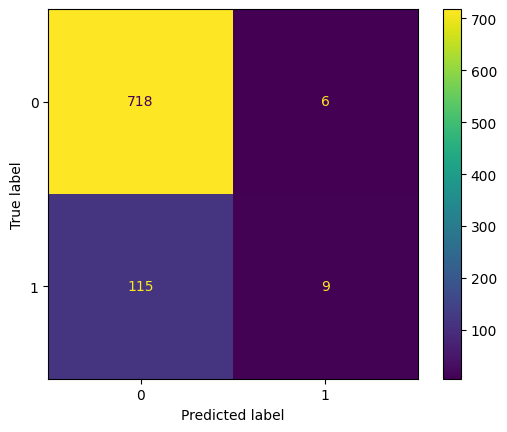

In [ ]:
ConfusionMatrixDisplay.from_estimator(LR_model,X_test,y_test)

In [ ]:
print(classification_report(y_test , LR_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , DecisionTreeClassifier())
dt_model.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
dt_model.score(X_train , y_train)



1.0

In [ ]:
dt_pred = dt_model.predict(X_test)
dt_acc_score = accuracy_score(y_test , dt_pred)
dt_acc_score

0.7676886792452831

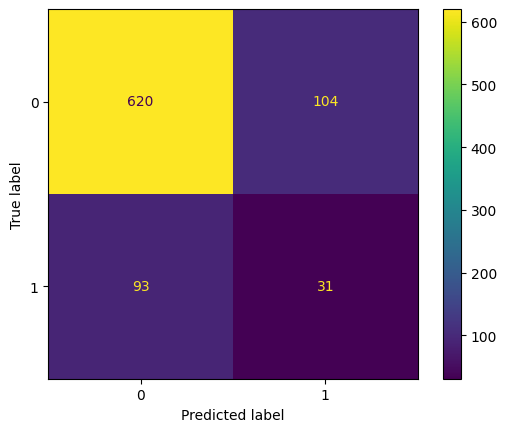

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_model , X_test , y_test);

In [ ]:
print(classification_report(y_test , dt_pred)) #OVERFITTING OCCURS HERE

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       724
           1       0.23      0.25      0.24       124

    accuracy                           0.77       848
   macro avg       0.55      0.55      0.55       848
weighted avg       0.78      0.77      0.77       848



In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree'], 'Accuracy': [testing_acc*100,dt_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.731132
1,Decision Tree,76.768868


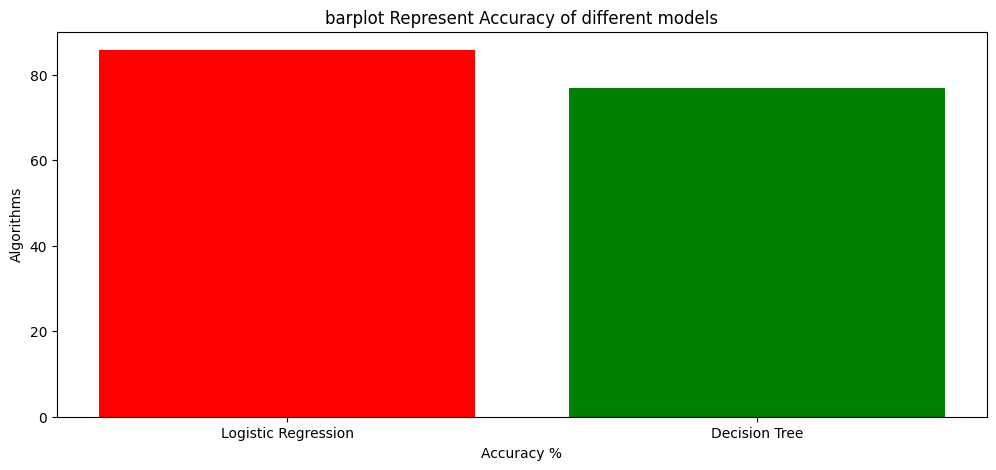

In [ ]:
colors = ['red','green']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()